<a href="https://colab.research.google.com/github/ManishSharma2002/Deep-learning-/blob/main/MLP_using_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/drive/MyDrive/deep learning/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.drop(columns = ["Serial No."],inplace =True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = ["Chance of Admit "],axis = 1),df["Chance of Admit "],test_size = 0.2,random_state= 16)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((320, 7), (80, 7), (320,), (80,))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
model  = Sequential()
model.add(Dense(7, activation = "relu", input_dim = 7))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "linear"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss = "mean_squared_error", optimizer = "Adam")

In [20]:
history = model.fit(x_train_scaled,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4426 - val_loss: 0.3615
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3675 - val_loss: 0.2993
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2980 - val_loss: 0.2419
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2410 - val_loss: 0.1892
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1811 - val_loss: 0.1419
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1342 - val_loss: 0.1012
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1022 - val_loss: 0.0700
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0653 - val_loss: 0.0479
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0475 - val_loss: 0.0348
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0376 - val_loss: 0.0285
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0350 - val_loss: 0.0260
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0293 - val_lo

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 188 (756.00 B)

In [23]:
history.history

{'loss': [0.426288366317749,
  0.3606985807418823,
  0.29336899518966675,
  0.23213155567646027,
  0.1777251958847046,
  0.12981584668159485,
  0.09137769788503647,
  0.06276269257068634,
  0.04487183317542076,
  0.035571444779634476,
  0.031397588551044464,
  0.029797565191984177,
  0.028696615248918533,
  0.027664711698889732,
  0.026626894250512123,
  0.025597508996725082,
  0.024481438100337982,
  0.023094328120350838,
  0.021653208881616592,
  0.020001133903861046,
  0.018224777653813362,
  0.016524482518434525,
  0.014922291971743107,
  0.013425419107079506,
  0.011743398383259773,
  0.010757294483482838,
  0.010108266957104206,
  0.009544102475047112,
  0.009035902097821236,
  0.008568589575588703,
  0.008200401440262794,
  0.007891267538070679,
  0.007602139376103878,
  0.00734442425891757,
  0.007147982716560364,
  0.006984089035540819,
  0.006802240386605263,
  0.006701154168695211,
  0.006548682227730751,
  0.006490793079137802,
  0.006357905454933643,
  0.006286310497671366

In [24]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test_scaled)
r2_score(y_test,y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


0.7736221525390367

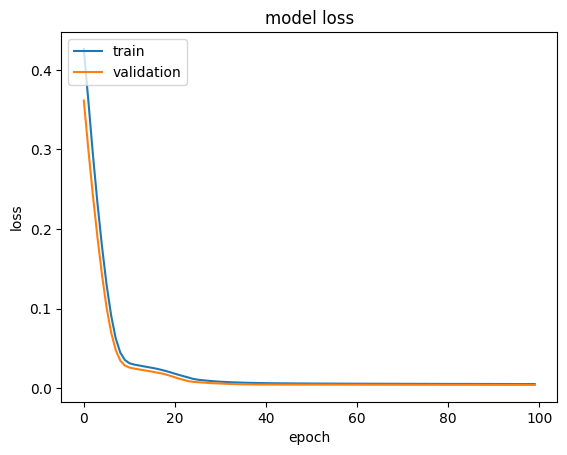

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()